In [14]:
import pandas as pd
df = pd.read_csv("drive/MyDrive/Colab Notebooks/datasetstunting13.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   JenisKelamin              156 non-null    int64
 1   Umur                      156 non-null    int64
 2   BeratLahir                156 non-null    int64
 3   TinggiLahir               156 non-null    int64
 4   AsiEksklusif              156 non-null    int64
 5   LilaHamil                 156 non-null    int64
 6   TinggiIbu                 156 non-null    int64
 7   RiwayatKehamilanPrematur  156 non-null    int64
 8   UsiaIbuHamil              156 non-null    int64
 9   PendidikanIbu             156 non-null    int64
 10  Pendapatan                156 non-null    int64
 11  Berat                     156 non-null    int64
 12  Tinggi                    156 non-null    int64
 13  StatusStunting            156 non-null    int64
dtypes: int64(14)
memory usage: 17.2 KB


In [15]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values
print(x.shape)

(156, 13)


In [16]:
import sklearn
from sklearn import datasets


In [17]:
# load dataset iris
iris = datasets.load_iris()

In [18]:
# pisahkan atribut dan label pada dataset
z = iris.data
q = iris.target

In [19]:
from sklearn.model_selection import train_test_split

# membagi datasets menjadi training dan testing
xtrain,xtes,ytrain,ytes=train_test_split(x,y,train_size=0.8,random_state=42) 

In [20]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=9,activation='relu', input_shape=(13,)))
model.add(tf.keras.layers.Dense(units=1))

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.01))

In [26]:
model.fit(xtrain, ytrain, epochs=300, validation_data=(xtes, ytes))

Epoch 1/300
4/4 [==============================] - 0s 26ms/step - loss: 0.1631 - val_loss: 0.1369
Epoch 2/300
4/4 [==============================] - 0s 12ms/step - loss: 0.1649 - val_loss: 0.1563
Epoch 3/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1789 - val_loss: 0.1825
Epoch 4/300
4/4 [==============================] - 0s 11ms/step - loss: 0.2014 - val_loss: 0.2057
Epoch 5/300
4/4 [==============================] - 0s 11ms/step - loss: 0.2005 - val_loss: 0.1378
Epoch 6/300
4/4 [==============================] - 0s 12ms/step - loss: 0.1741 - val_loss: 0.1531
Epoch 7/300
4/4 [==============================] - 0s 11ms/step - loss: 0.1715 - val_loss: 0.1372
Epoch 8/300
4/4 [==============================] - 0s 11ms/step - loss: 0.1707 - val_loss: 0.1581
Epoch 9/300
4/4 [==============================] - 0s 11ms/step - loss: 0.1741 - val_loss: 0.1364
Epoch 10/300
4/4 [==============================] - 0s 11ms/step - loss: 0.1754 - val_loss: 0.1514
Epoch 11/300
4/4 [=

In [27]:
model.evaluate(xtes, ytes)

1/1 [==============================] - 0s 31ms/step - loss: 0.1195


0.11945655941963196

1/1 [==============================] - 0s 20ms/step


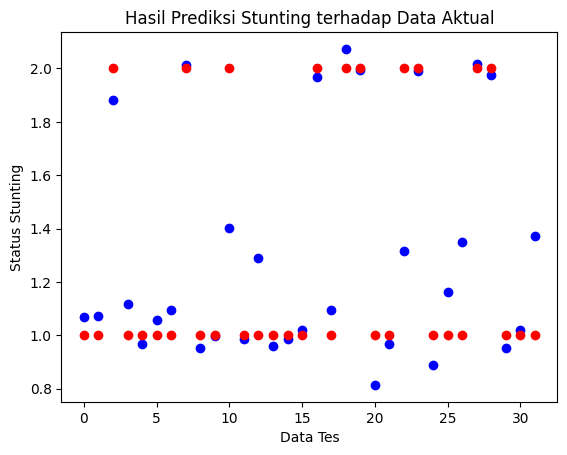

In [28]:
hasil = model.predict(xtes)

import matplotlib.pyplot as plt

a=range(len(ytes))

plt.scatter(a,hasil,color='blue')
plt.scatter(a,ytes,color='red')
plt.title("Hasil Prediksi Stunting terhadap Data Aktual")
plt.xlabel("Data Tes")
plt.ylabel("Status Stunting")
plt.show()